# Visualizations Project 4
---

### Import Dependencies

In [36]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress

### Specify Path to Data

In [16]:
# Specify the path to the data directory relative to your notebook
data_directory = '../../df_biden_v_trump24/df_biden_v_trump24-cleaned/csv_cleaned'  # Go up two levels from the notebook directory

# Construct paths to the CSV file
file_path_csv_cleaned_historical_elections = os.path.join(data_directory, 'historical_elections.csv')
file_path_csv_cleaned_biden_v_trump24 = os.path.join(data_directory, 'biden_v_trump24.csv')

### Import Data

In [17]:
# Import into dataframes the CSV files using pandas
df_historical_elections = pd.read_csv(file_path_csv_cleaned_historical_elections)
df_biden_v_trump24 = pd.read_csv(file_path_csv_cleaned_biden_v_trump24)

### Data Exploration

In [19]:
# Display all four dataframes
print("V df_historical_elections has these values: V")
display(df_historical_elections.head(1))

print("V df_biden_v_trump24 has these values: V")
display(df_biden_v_trump24.head(1))

V df_historical_elections has these values: V


,enddate,samplesize,results,favorability_r,favorability_d
0,2019-12-10 00:00:00,1203.0,0,-7.9989,-22.0006


V df_biden_v_trump24 has these values: V


,end_date,samplesize,results,favorability_r,favorability_d
0,2023-08-08,1500.0,0,-30.3341,-22.334


### Generate generic starter visualizations

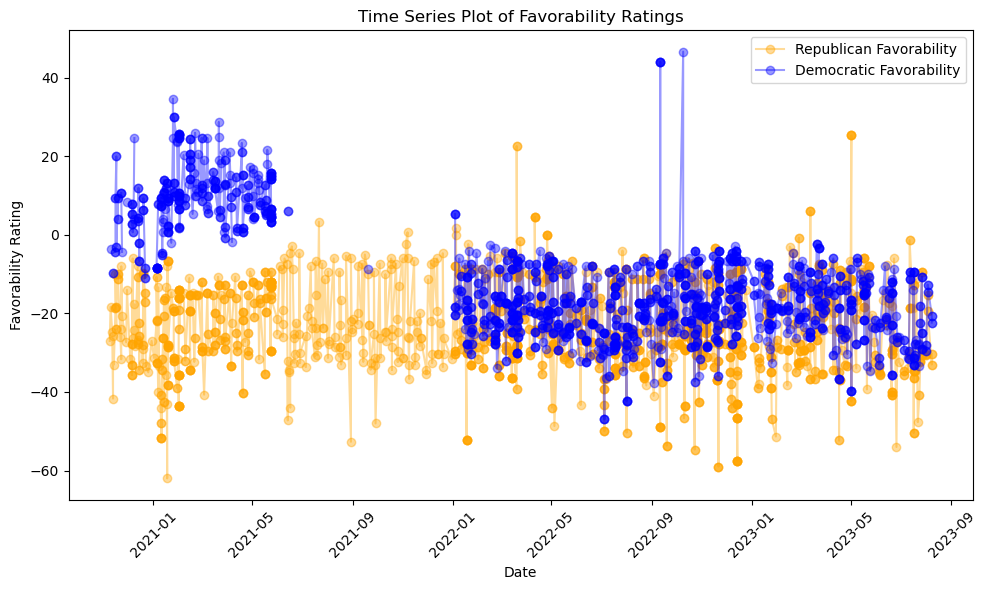

<Figure size 1000x600 with 0 Axes>

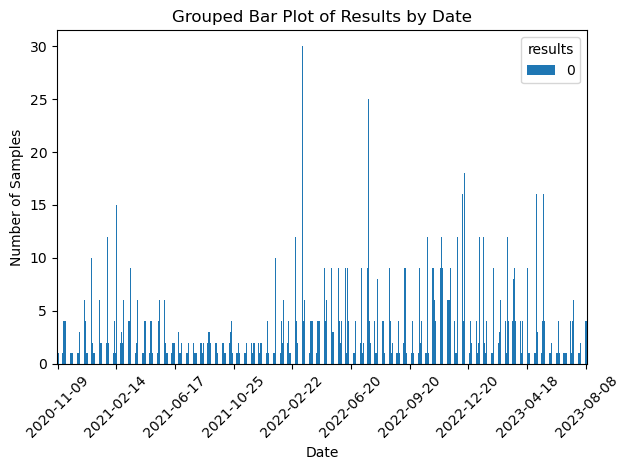

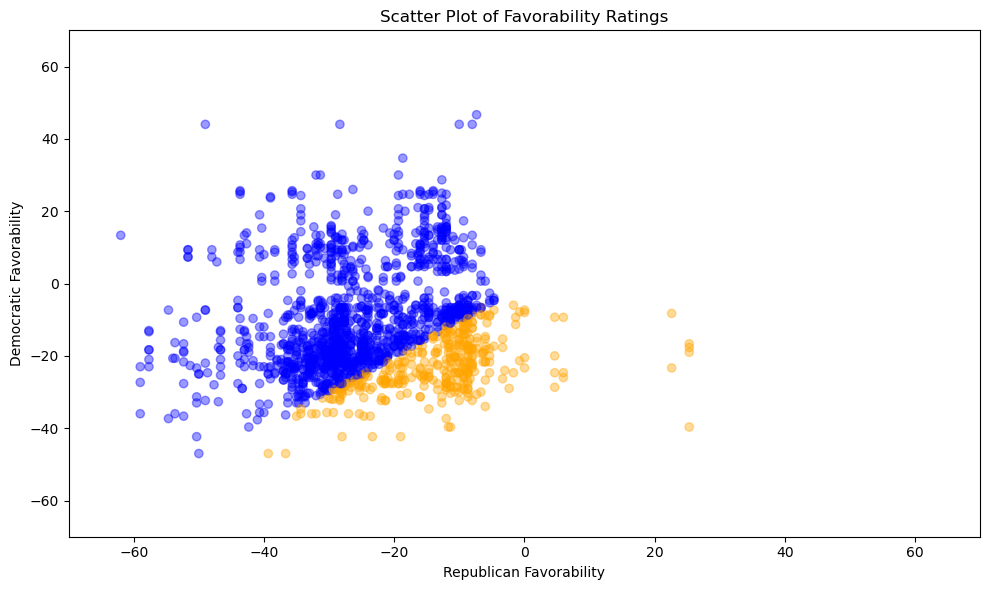

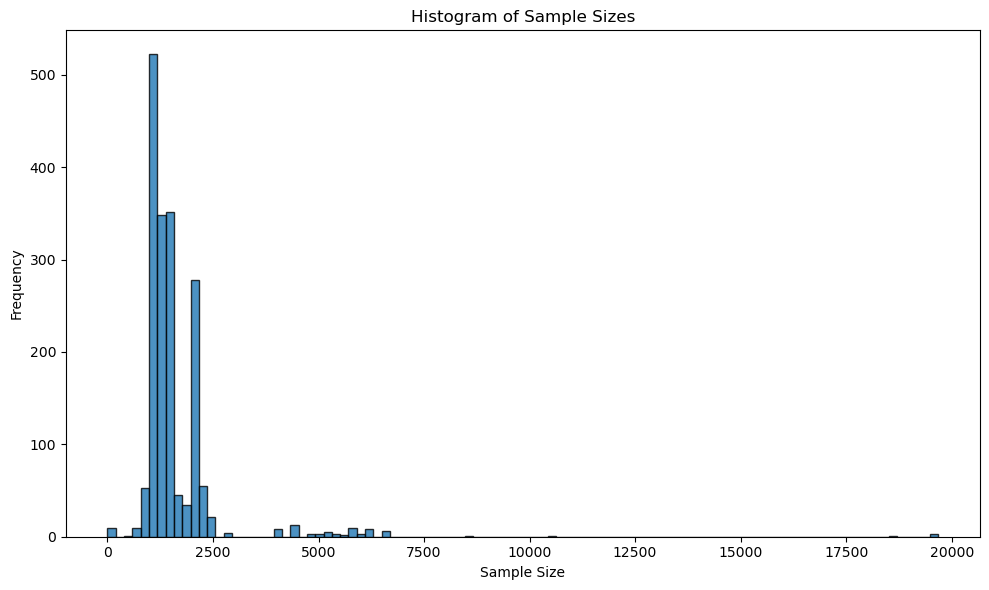

In [42]:
# Convert 'end_date' to datetime format
df_biden_v_trump24['end_date'] = pd.to_datetime(df_biden_v_trump24['end_date'])

# Time Series Plot of Favorability Ratings
plt.figure(figsize=(10, 6))
plt.plot(df_biden_v_trump24['end_date'], df_biden_v_trump24['favorability_r'], label='Republican Favorability', color='orange', marker='o', alpha=0.4)
plt.plot(df_biden_v_trump24['end_date'], df_biden_v_trump24['favorability_d'], label='Democratic Favorability', color='blue', marker='o', alpha=0.4)
plt.xlabel('Date')
plt.ylabel('Favorability Rating')
plt.title('Time Series Plot of Favorability Ratings')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Grouped Bar Plot of Results by Date
plt.figure(figsize=(10, 6))
result_counts = df_biden_v_trump24.groupby('end_date')['results'].value_counts().unstack().fillna(0)
ax = result_counts.plot(kind='bar', stacked=True)
plt.xlabel('Date')
plt.ylabel('Number of Samples')
plt.title('Grouped Bar Plot of Results by Date')
# Rotate x-axis tick labels for better readability
plt.xticks(rotation=45)
# Generate custom tick positions and labels
tick_positions = np.linspace(0, len(result_counts) - 1, num=10, dtype=int)  # Generate 10 evenly spaced ticks
tick_labels = [result_counts.index[i].strftime('%Y-%m-%d') for i in tick_positions]
plt.xticks(tick_positions, tick_labels)
plt.tight_layout()
plt.show()


# Scatter Plot of Favorability Ratings
plt.figure(figsize=(10, 6))
# Iterate through the data points and set color based on the condition
colors = ['orange' if x > y else 'blue' for x, y in zip(df_biden_v_trump24['favorability_r'], df_biden_v_trump24['favorability_d'])]
plt.scatter(
    df_biden_v_trump24['favorability_r'],
    df_biden_v_trump24['favorability_d'],
    color=colors,  # Use the colors list for color mapping
    alpha=0.4
)
plt.xlabel('Republican Favorability')
plt.ylabel('Democratic Favorability')
plt.title('Scatter Plot of Favorability Ratings')
plt.xlim(-70, 70)
plt.ylim(-70, 70)
plt.tight_layout()
plt.show()

# Histogram of Sample Sizes
plt.figure(figsize=(10, 6))
plt.hist(df_biden_v_trump24['samplesize'], bins=100, edgecolor='black', alpha=0.8)
plt.xlabel('Sample Size')
plt.ylabel('Frequency')
plt.title('Histogram of Sample Sizes')
plt.tight_layout()
plt.show()


### Now compare historical data with current data

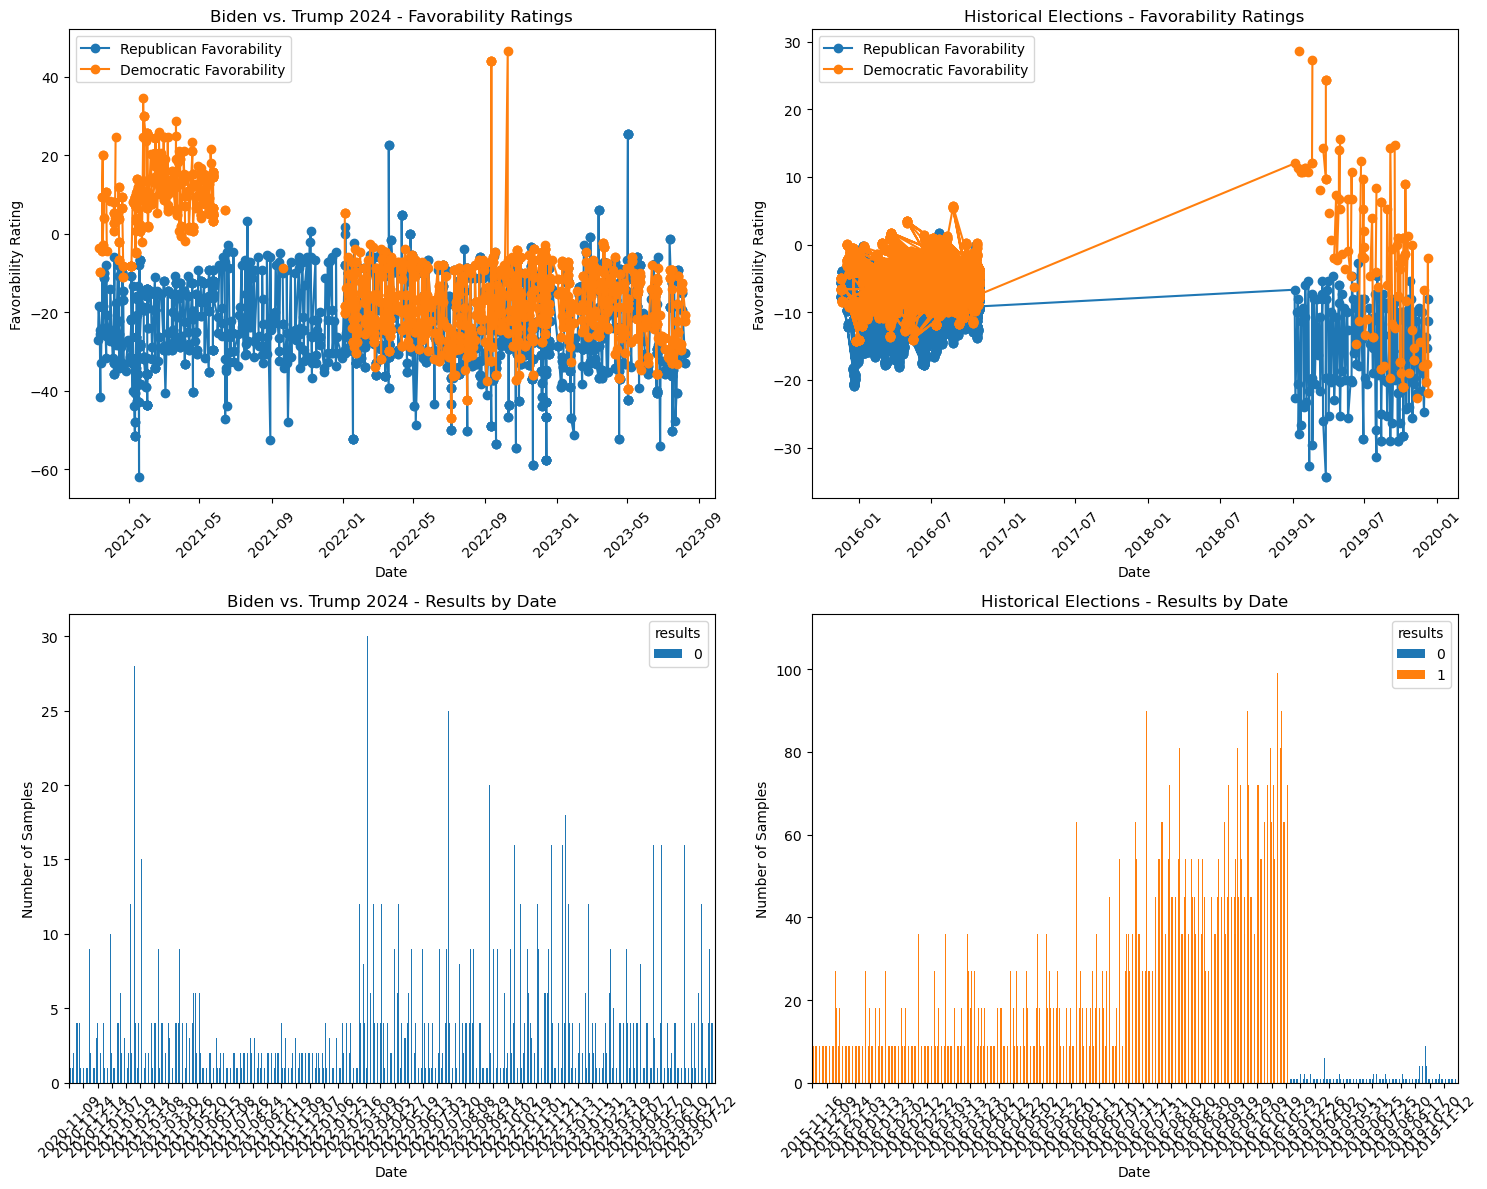

In [43]:
# Convert 'end_date' to datetime format for both DataFrames
# df_biden_v_trump24['end_date'] = pd.to_datetime(df_biden_v_trump24['end_date'])
df_historical_elections['enddate'] = pd.to_datetime(df_historical_elections['enddate'])

# Create subplots for comparing plots side by side
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))

# Time Series Plot of Favorability Ratings for df_historical_elections
axes[0, 1].plot(df_historical_elections['enddate'], df_historical_elections['favorability_r'], label='Republican Favorability', marker='o')
axes[0, 1].plot(df_historical_elections['enddate'], df_historical_elections['favorability_d'], label='Democratic Favorability', marker='o')
axes[0, 1].set_xlabel('Date')
axes[0, 1].set_ylabel('Favorability Rating')
axes[0, 1].set_title('Historical Elections - Favorability Ratings')
axes[0, 1].legend()
axes[0, 1].tick_params(axis='x', rotation=45)

# Time Series Plot of Favorability Ratings for df_biden_v_trump24
axes[0, 0].plot(df_biden_v_trump24['end_date'], df_biden_v_trump24['favorability_r'], label='Republican Favorability', marker='o')
axes[0, 0].plot(df_biden_v_trump24['end_date'], df_biden_v_trump24['favorability_d'], label='Democratic Favorability', marker='o')
axes[0, 0].set_xlabel('Date')
axes[0, 0].set_ylabel('Favorability Rating')
axes[0, 0].set_title('Biden vs. Trump 2024 - Favorability Ratings')
axes[0, 0].legend()
axes[0, 0].tick_params(axis='x', rotation=45)

# Grouped Bar Plot of Results for df_historical_elections
result_counts_historical_elections = df_historical_elections.groupby('enddate')['results'].value_counts().unstack().fillna(0)
ax_h = result_counts_historical_elections.plot(kind='bar', stacked=True, ax=axes[1, 1])
axes[1, 1].set_xlabel('Date')
axes[1, 1].set_ylabel('Number of Samples')
axes[1, 1].set_title('Historical Elections - Results by Date')
# Adjust x-axis tick positions and labels
tick_positions = range(0, len(result_counts_historical_elections.index), 10)  # Adjust step size as needed
tick_labels = [result_counts_historical_elections.index[i].strftime('%Y-%m-%d') for i in tick_positions]
ax_h.set_xticks(tick_positions)
ax_h.set_xticklabels(tick_labels, rotation=45)

# Grouped Bar Plot of Results for df_biden_v_trump24
result_counts_biden_v_trump24 = df_biden_v_trump24.groupby('end_date')['results'].value_counts().unstack().fillna(0)
ax_b_d = result_counts_biden_v_trump24.plot(kind='bar', stacked=True, ax=axes[1, 0])
axes[1, 0].set_xlabel('Date')
axes[1, 0].set_ylabel('Number of Samples')
axes[1, 0].set_title('Biden vs. Trump 2024 - Results by Date')
# Adjust x-axis tick positions and labels
tick_positions = range(0, len(result_counts_biden_v_trump24.index), 10)  # Adjust step size as needed
tick_labels = [result_counts_biden_v_trump24.index[i].strftime('%Y-%m-%d') for i in tick_positions]
ax_b_d.set_xticks(tick_positions)
ax_b_d.set_xticklabels(tick_labels, rotation=45)

# Adjust layout and display plots
plt.tight_layout()
plt.show()

# SO, WHO WILL BE PRESIDENT?! 🤷‍♂️
## ... but, the model suggests Biden!